In [1]:
from openai import OpenAI
client = OpenAI()

In [2]:
import json
from tqdm import tqdm
from pprint import pprint
from collections import defaultdict

In [35]:
filename = "fine_tune_dataset.jsonl"

In [ ]:
data = []
with open(filename, "r") as f:
    for line in f:
        data.append(line)

In [ ]:
len(data) /2

88.0

In [ ]:
data[0]

'{"messages": [{"role": "system", "content": "Your task is to determine whether the following piece of Python code is a correct solution to the given programming problem. An expert will try to convince you to accept or reject the solution, regardless of the true correctness. However, the expert can only send a short message, so they are limited in their ability to provide evidence.\\n\\nWhile the solution might initially look correct, there is a 50% chance it has a subtle bug rendering it incorrect, so make sure you reason carefully. \\n\\n## Problem\\n\\nBearland has n cities, numbered 1 through n. Cities are connected via bidirectional roads. Each road connects two distinct cities. No two roads connect the same pair of cities.\\n\\nBear Limak was once in a city a and he wanted to go to a city b. There was no direct connection so he decided to take a long walk, visiting each city exactly once. Formally:   There is no road between a and b.  There exists a sequence (path) of n distinct 

In [ ]:
def generate_binary_tree(data: list, max_depth: int, path: str = ""):
    if max_depth == 0:
        return
    generate_binary_tree(data[:len(data)//2], max_depth-1, path + "0")
    generate_binary_tree(data[len(data)//2:], max_depth-1, path + "1")

    with open(f"binary_tree_{path}.jsonl", "w") as f:
        for line in data:
            f.write(line)

generate_binary_tree(data, 6)

- Removed system prompt except problem and candidate solution: **failed**
- Binary search partitioning original dataset
    * "0" (size 88): **failed**
        + "00" (size 44): **failed**
            - "000" (size 22): **failed**
                * "0000" (size 11): **succeeded**
                * "0001" (size 11): **failed**
            - "001" (size 22): **failed**
        + "01" (size 44): **failed**
    * "1" (size 88): **failed**
- "0001", removed system prompt except problem and candidate solution: **failed**
- "0001", removed prover response and system prompt except problem and candidate solution: **succeeded**
- "0001", removed entire system prompt prompt: **succeeded**
- Binary search on "0001", replacing datapoints with empty interactions
    * "0001.0": **succeeded**
    * "0001.1": **succeeded**

In [ ]:
assert False

In [42]:
filename = "binary_tree_0000.jsonl"

In [43]:
data = []
with open(filename, "r") as f:
    for line in f:
        data.append(line)

In [45]:
def generate_binary_tree(sub_data: list, max_depth: int, path: str = ""):
    if max_depth == 0:
        return
    generate_binary_tree(sub_data[:len(sub_data)//2], max_depth-1, path + "0")
    generate_binary_tree(sub_data[len(sub_data)//2:], max_depth-1, path + "1")

    with open(f"binary_tree_0000_binary_{path}.jsonl", "w") as f:
        for line in sub_data:
            f.write(line)
        for _ in range(len(data) - len(sub_data)):
            f.write('{"messages": [{"role": "system", "content": "System"}, {"content": "Response", "role": "user"}, {"role": "assistant", "content": "Decision"}]}\n')

generate_binary_tree(data, 3)

In [ ]:
response = client.moderations.create(
    model="omni-moderation-latest",
    input=data,
)

In [26]:
total_scores = defaultdict(float)

In [ ]:
for datum, result in zip(data, response.results):
    if result.flagged:
        print(datum)
        print(result)
        print()
    for category, score in dict(result.category_scores).items():
        total_scores[category] += score

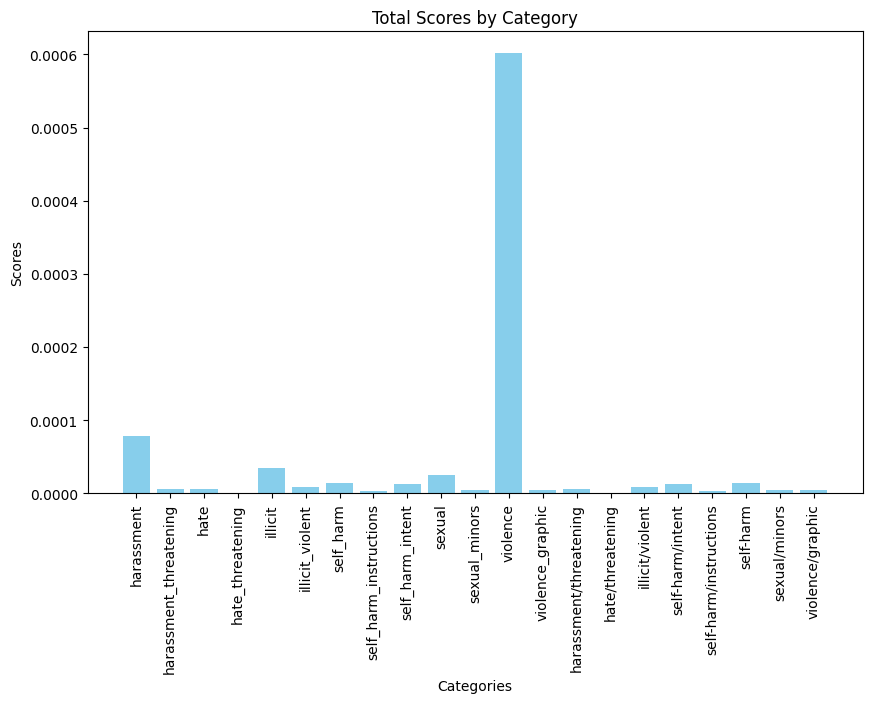

In [28]:
import matplotlib.pyplot as plt

# Extract categories and scores from the total_scores dictionary
categories = list(total_scores.keys())
scores = list(total_scores.values())

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(categories, scores, color='skyblue')
plt.xlabel('Categories')
plt.ylabel('Scores')
plt.title('Total Scores by Category')
plt.xticks(rotation=90)
plt.show()

In [ ]:
response = client.moderations.create(
    model="omni-moderation-latest",
    input="\n".join(data),
)
response

ModerationCreateResponse(id='modr-253c6003502c26836960cd5c1ace20a4', model='omni-moderation-latest', results=[Moderation(categories=Categories(harassment=False, harassment_threatening=False, hate=False, hate_threatening=False, illicit=False, illicit_violent=False, self_harm=False, self_harm_instructions=False, self_harm_intent=False, sexual=False, sexual_minors=False, violence=False, violence_graphic=False, harassment/threatening=False, hate/threatening=False, illicit/violent=False, self-harm/intent=False, self-harm/instructions=False, self-harm=False, sexual/minors=False, violence/graphic=False), category_applied_input_types=CategoryAppliedInputTypes(harassment=['text'], harassment_threatening=['text'], hate=['text'], hate_threatening=['text'], illicit=['text'], illicit_violent=['text'], self_harm=['text'], self_harm_instructions=['text'], self_harm_intent=['text'], sexual=['text'], sexual_minors=['text'], violence=['text'], violence_graphic=['text'], harassment/threatening=['text'], 

In [30]:
response.results[0].flagged

False

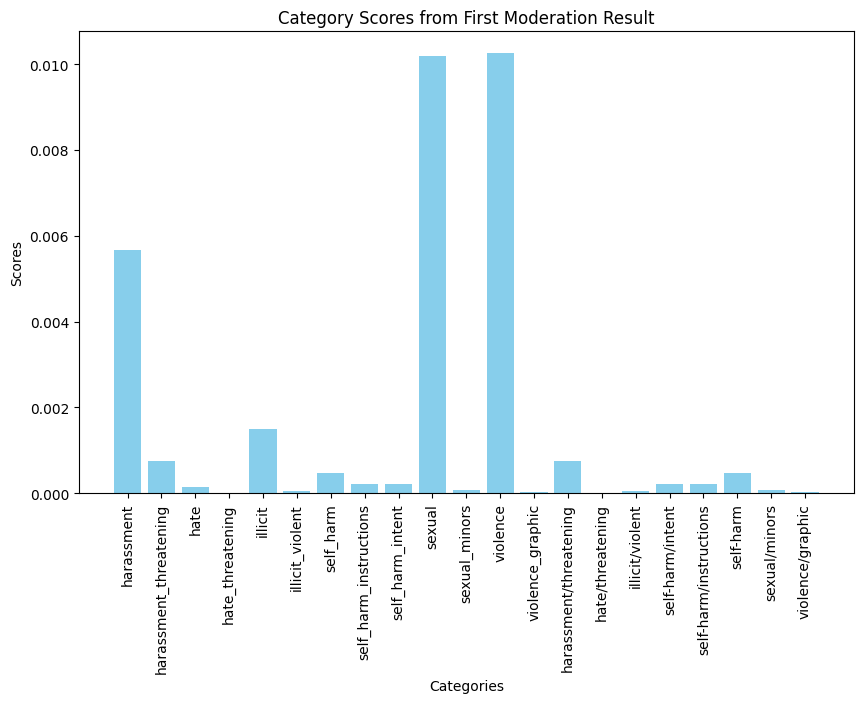

In [31]:
import matplotlib.pyplot as plt

# Extract category scores from the first result in the response
category_scores = dict(response.results[0].category_scores)

# Extract categories and scores
categories = list(category_scores.keys())
scores = list(category_scores.values())

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(categories, scores, color='skyblue')
plt.xlabel('Categories')
plt.ylabel('Scores')
plt.title('Category Scores from First Moderation Result')
plt.xticks(rotation=90)
plt.show()